In [25]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
images_dir = "./../data/images"
image_files = os.listdir(images_dir)

In [27]:
image_path = "{}/{}".format(images_dir, "76A-076.76.jpg")

In [28]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [29]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

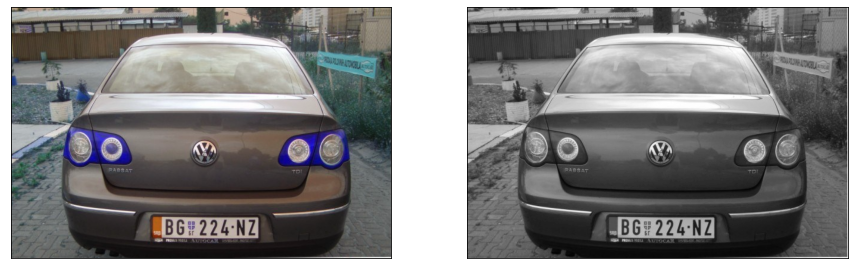

In [30]:
plot_images(image, gray)

In [31]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

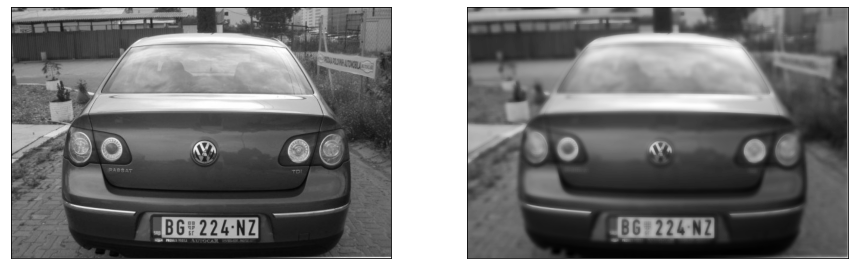

In [32]:
plot_images(gray, blur)

In [33]:
edges = cv2.Canny(blur, 30, 200)

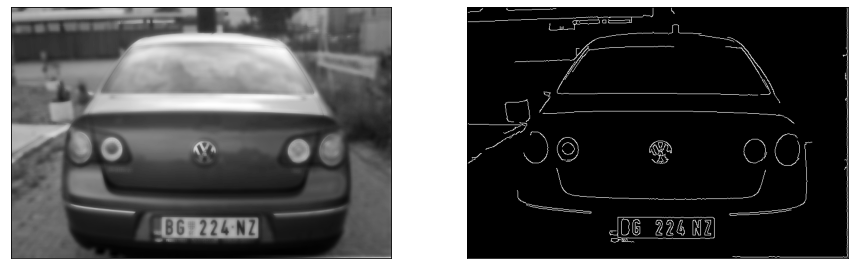

In [34]:
plot_images(blur, edges)

In [35]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [36]:
image_copy = image.copy()

In [37]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

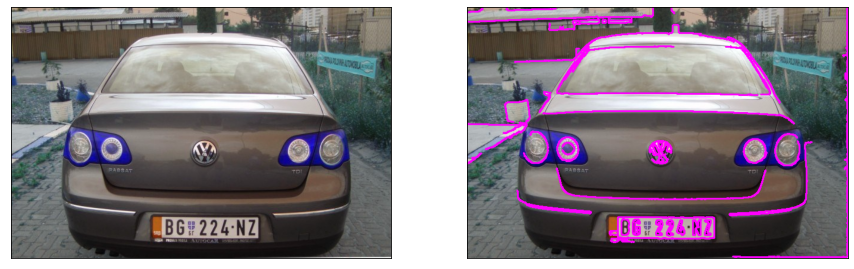

In [38]:
plot_images(image, image_copy)

In [39]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [40]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

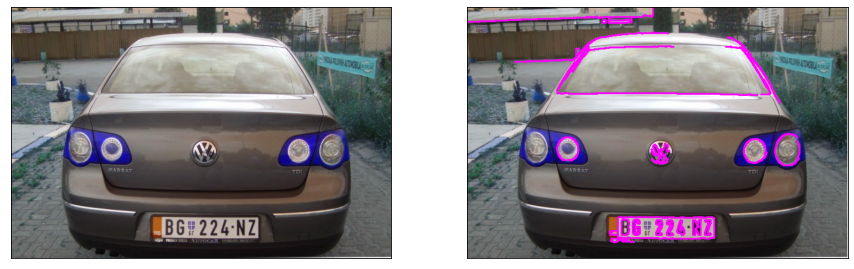

In [41]:
plot_images(image, image_copy)

In [42]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.04 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

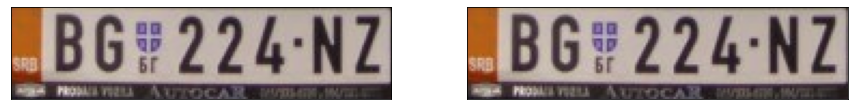

In [43]:
plot_images(plate, plate)

In [44]:
def handle(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)

    white = [255,255,255]
    img_border = cv2.copyMakeBorder(thresh,10,10,10,10,cv2.BORDER_CONSTANT,value=white)

    # kernel = np.ones((3,3), np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    img_dilate = cv2.dilate(img_border, kernel, iterations=1)

    # resize image
    resized = cv2.resize(img_dilate, (28,28))

    return resized

In [45]:
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

def recognition(image):
    # Morph open to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=1)

    # Perform text extraction
    data = pytesseract.image_to_string(opening, lang='eng', config='--psm 6')
    return data



In [46]:
gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

max_h = 1
for contour in contours:
    boundRect = cv2.boundingRect(contour)
    x, y, w, h = boundRect
    if max_h < h :
        max_h = h
        
i=0
for contour in contours:
        boundRect = cv2.boundingRect(contour)
        x, y, w, h = boundRect
        if h >= max_h - 20 and w < 100:
            plate_sub = plate[y:y+h, x:x+w][:,:,::-1]
            cv2.imwrite(f"plate{i}.png", handle(plate_sub))
        i += 1

In [51]:
image_number = 25
while os.path.isfile('./plate{}.png'.format(image_number)):
    try:
        img = cv2.imread('./plate{}.png'.format(image_number))[:,:,0]
        print(recognition(img))
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1

N

Z

4

2

2

6

B



In [48]:
print(recognition(thresh))

BG 224-NZ

